{'0 101 01 10': 73, '0 101 11 11': 65, '0 000 11 00': 71, '0 100 11 10': 67, '0 111 00 00': 64, '0 110 00 11': 67, '0 001 11 11': 51, '0 111 11 01': 63, '0 100 00 01': 63, '0 000 01 11': 60, '0 011 00 11': 56, '0 010 11 01': 52, '1 100 11 00': 58, '0 101 00 11': 60, '0 101 01 01': 64, '0 001 10 01': 69, '0 100 10 01': 60, '0 000 00 10': 58, '0 100 01 00': 56, '0 111 10 10': 56, '0 111 00 10': 63, '0 000 10 10': 56, '0 011 01 10': 64, '0 010 10 10': 63, '0 000 00 01': 61, '0 111 10 11': 63, '0 100 01 11': 66, '0 111 01 00': 66, '0 100 10 10': 64, '0 010 01 11': 83, '0 001 00 11': 66, '0 100 00 11': 69, '0 111 11 11': 67, '0 010 11 10': 60, '0 011 00 10': 63, '0 010 00 00': 43, '1 110 10 10': 65, '0 111 10 01': 68, '0 001 01 10': 75, '0 110 11 00': 62, '0 100 11 01': 74, '0 111 00 01': 71, '0 010 00 10': 60, '0 011 11 10': 63, '0 000 10 11': 61, '0 011 10 11': 66, '0 010 01 01': 65, '0 111 01 10': 53, '0 101 10 01': 57, '0 111 01 01': 69, '0 010 01 10': 70, '0 011 10 10': 55, '0 100 01 0

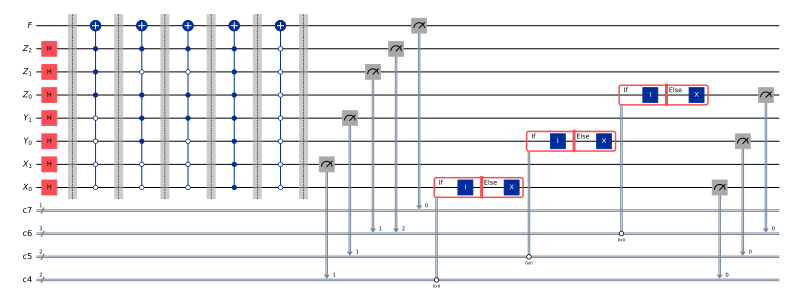

In [2]:
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(2, name='X')
q_Y = QuantumRegister(2, name='Y')
q_Z = QuantumRegister(3, name='Z')
q_F = QuantumRegister(1, name='F')


c_X = ClassicalRegister(2)
c_Y = ClassicalRegister(2)
c_Z = ClassicalRegister(3)
c_F = ClassicalRegister(1)





circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F,c_X,c_Y,c_Z,c_F)# ,q_B,c_B



for h in range(7):
    circuit.append( HGate(),[h])
circuit.barrier()
gate1 = MCXGate(7,ctrl_state='1110000')
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1011100')
circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1111111')
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0000000')
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

circuit.measure(q_X[1],c_X[1])
circuit.measure(q_Y[1],c_Y[1])
for i in range(1, 3):
    circuit.measure(q_Z[i],c_Z[i])
circuit.measure(q_F,c_F)


x1 = c_X
y1 = c_Y
z1 = c_Z

with circuit.if_test((x1, 0b0))as else_:
         circuit.id(0) 
with else_:
    circuit.x(0)  
    
with circuit.if_test((y1,0b0))as else_:
         circuit.id(2) 
with else_:
    circuit.x(2) 
with circuit.if_test((z1, 0b00))as else_:   ##Z2=0..Z1==1
         circuit.id(4) 
with else_:
    circuit.x(4) 
    
circuit.measure(q_X[0], c_X[0])
circuit.measure(q_Y[0], c_Y[0])
circuit.measure(q_Z[0], c_Z[0])
backend = Aer.get_backend('qasm_simulator') # the device to run on

counts = backend.run(circuit,shots=8000).result().get_counts()
print(counts)
filename = "qufan_circuit.pdf"
image = circuit_drawer(circuit, output="mpl", filename=None,reverse_bits=True,scale=0.75,fold=100)
image.savefig(filename)
circuit.draw(output='mpl',reverse_bits=True,scale=0.5,fold=100)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

# 创建一个包含5个量子比特和5个经典比特的量子电路
qc = QuantumCircuit(5, 5)

# 创建一个简单的加法器
# 用1个量子比特表示一个二进制位
# 2+3 = 5，转换成二进制是 010 + 011 = 101
# 在量子比特上，我们需要从右往左排列
# 因此，2（010）的二进制位需要反转
qc.x(0) # 第一个量子比特表示最低位，因此反转
qc.x(1) # 第二个量子比特表示中间位，因此反转

# 将量子比特1和量子比特2相加，结果保存到量子比特3
qc.cx(0, 3) # CNOT门，控制比特为0，目标比特为3
qc.cx(1, 3) # CNOT门，控制比特为1，目标比特为3

# 将量子比特0和量子比特1的和加到量子比特4
qc.ccx(0, 1, 4) # Toffoli门，两个控制比特为0和1，目标比特为4

# 测量所有量子比特，并将结果存储在相应的经典比特上
qc.measure([0,1,3,4], [0,1,2,3])

# 使用qasm_simulator进行模拟
simulator = Aer.get_backend('qasm_simulator')

# 编译并运行量子电路
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

# 获取计算结果
counts = result.get_counts(qc)
print(counts)
qc.draw(output='mpl',reverse_bits=True,scale=0.6,fold=1000)


In [ ]:
#比较器
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

q_X = QuantumRegister(4, name='X')


c_X = ClassicalRegister(1)
circuit = QuantumCircuit(q_X,c_X)# ,q_B,c_B
a=3
comparator = IntegerComparator(num_state_qubits=2, value=3, geq=True)
circuit.x(0)
circuit.x(1)

circuit = circuit.compose(comparator)
circuit.measure(q_X[2],c_X[0])

backend = Aer.get_backend('qasm_simulator') # the device to run on
tqc = transpile(circuit, backend)
counts = backend.run(tqc).result().get_counts()
print(counts)
circuit.draw(output='mpl',reverse_bits=True)

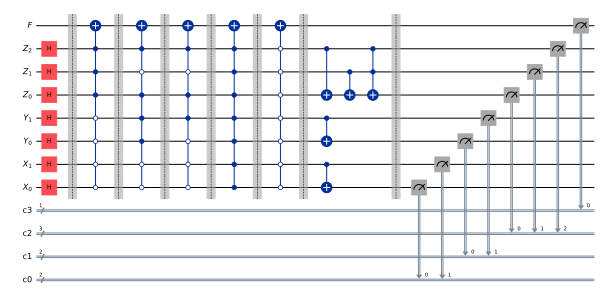

In [1]:
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(2, name='X')
q_Y = QuantumRegister(2, name='Y')
q_Z = QuantumRegister(3, name='Z')
q_F = QuantumRegister(1, name='F')


c_X = ClassicalRegister(2)
c_Y = ClassicalRegister(2)
c_Z = ClassicalRegister(3)
c_F = ClassicalRegister(1)





circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F,c_X,c_Y,c_Z,c_F)# ,q_B,c_B



for h in range(7):
    circuit.append( HGate(),[h])
circuit.barrier()
gate1 = MCXGate(7,ctrl_state='1110000')
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1011100')
circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1111111')
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0000000')
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate6 = MCXGate(1,ctrl_state='1')
circuit.append(gate6, [6,4])#门的名称，控制位，控制目标
gate9 = MCXGate(1,ctrl_state='1')
circuit.append(gate9, [5,4])#门的名称，控制位，控制目标
gate7 = MCXGate(1,ctrl_state='1')
circuit.append(gate7, [3,2])#门的名称，控制位，控制目标
gate8 = MCXGate(1,ctrl_state='1')
circuit.append(gate8, [1,0])#门的名称，控制位，控制目标
gate10 = MCXGate(2,ctrl_state='11')
circuit.append(gate10, [6,5,4])#门的名称，控制位，控制目标
circuit.barrier()

#for i in range(1, 3):
#    circuit.measure(q_Z[i],c_Z[i])
#circuit.measure(q_F,c_F)
#
#
#x1 = c_X
#y1 = c_Y
#z1 = c_Z
#
#with circuit.if_test((x1, 0b0))as else_:
#         circuit.id(0) 
#with else_:
#    circuit.x(0)  
#    
#with circuit.if_test((y1,0b0))as else_:
#         circuit.id(2) 
#with else_:
#    circuit.x(2) 
#with circuit.if_test((z1, 0b00))as else_:   ##Z2=0..Z1==1
#         circuit.id(4) 
#with else_:
#    circuit.x(4) 
#    
circuit.measure(q_X, c_X)
circuit.measure(q_Y, c_Y)
circuit.measure(q_Z, c_Z)
circuit.measure(q_F, c_F)
circuit.draw(output='mpl',reverse_bits=True,scale=0.5,fold=100)

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=1000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)
    

0 000 00 01
0 000 00 10
0 000 00 11
0 000 01 00
0 000 01 01
0 000 01 10
0 000 01 11
0 000 10 00
0 000 10 01
0 000 10 10
0 000 10 11
0 000 11 00
0 000 11 01
0 000 11 10
0 000 11 11
0 001 00 00
0 001 00 01
0 001 00 10
0 001 00 11
0 001 01 00
0 001 01 01
0 001 01 10
0 001 01 11
0 001 10 00
0 001 10 01
0 001 10 10
0 001 10 11
0 001 11 00
0 001 11 01
0 001 11 10
0 001 11 11
0 010 00 00
0 010 00 01
0 010 00 10
0 010 00 11
0 010 01 00
0 010 01 01
0 010 01 10
0 010 01 11
0 010 10 00
0 010 10 01
0 010 10 10
0 010 10 11
0 010 11 00
0 010 11 01
0 010 11 10
0 010 11 11
0 011 00 00
0 011 00 01
0 011 00 10
0 011 00 11
0 011 01 00
0 011 01 01
0 011 01 10
0 011 01 11
0 011 10 00
0 011 10 01
0 011 10 10
0 011 10 11
0 011 11 00
0 011 11 01
0 011 11 10
0 011 11 11
0 100 00 00
0 100 00 01
0 100 00 10
0 100 00 11
0 100 01 00
0 100 01 01
0 100 01 10
0 100 01 11
0 100 10 01
0 100 10 10
0 100 10 11
0 100 11 01
0 100 11 10
0 100 11 11
0 101 00 00
0 101 00 01
0 101 00 10
0 101 00 11
0 101 01 00
0 101 01 01
0 10

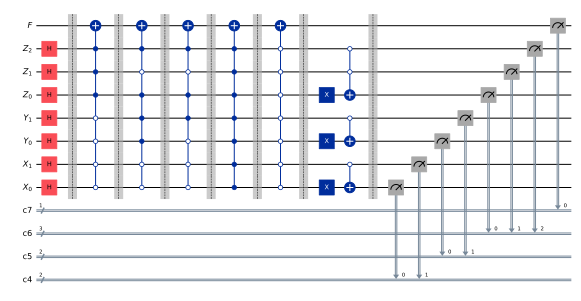

In [2]:
from qiskit.visualization import circuit_drawer
from qiskit.visualization import utils

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit.library import HGate
from qiskit.circuit.library import MCXGate
from qiskit_aer import Aer
from qiskit import *
from qiskit.visualization import plot_histogram

#####寄存
q_X = QuantumRegister(2, name='X')
q_Y = QuantumRegister(2, name='Y')
q_Z = QuantumRegister(3, name='Z')
q_F = QuantumRegister(1, name='F')


c_X = ClassicalRegister(2)
c_Y = ClassicalRegister(2)
c_Z = ClassicalRegister(3)
c_F = ClassicalRegister(1)





circuit = QuantumCircuit(q_X,q_Y,q_Z,q_F,c_X,c_Y,c_Z,c_F)# ,q_B,c_B



for h in range(7):
    circuit.append( HGate(),[h])
circuit.barrier()
gate1 = MCXGate(7,ctrl_state='1110000')
circuit.append(gate1, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate2 = MCXGate(7,ctrl_state='1011100')
circuit.append(gate2, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate3 = MCXGate(7,ctrl_state='1011000')
circuit.append(gate3, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate4 = MCXGate(7,ctrl_state='1111111')
circuit.append(gate4, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()

gate5 = MCXGate(7,ctrl_state='0000000')
circuit.append(gate5, [0, 1 ,2, 3, 4, 5,  6,7])#门的名称，控制位，控制目标
circuit.barrier()
circuit.x(4)
circuit.x(2)
circuit.x(0)
gate6 = MCXGate(2,ctrl_state='00')
circuit.append(gate6, [6,5,4])#门的名称，控制位，控制目标
gate7 = MCXGate(1,ctrl_state='0')
circuit.append(gate7, [3,2])#门的名称，控制位，控制目标
gate8 = MCXGate(1,ctrl_state='0')
circuit.append(gate8, [1,0])#门的名称，控制位，控制目标
#gate10 = MCXGate(2,ctrl_state='11')
#circuit.append(gate10, [6,5,4])#门的名称，控制位，控制目标
circuit.barrier()

#for i in range(1, 3):
#    circuit.measure(q_Z[i],c_Z[i])
#circuit.measure(q_F,c_F)
#
#
#x1 = c_X
#y1 = c_Y
#z1 = c_Z
#
#with circuit.if_test((x1, 0b0))as else_:
#         circuit.id(0) 
#with else_:
#    circuit.x(0)  
#    
#with circuit.if_test((y1,0b0))as else_:
#         circuit.id(2) 
#with else_:
#    circuit.x(2) 
#with circuit.if_test((z1, 0b00))as else_:   ##Z2=0..Z1==1
#         circuit.id(4) 
#with else_:
#    circuit.x(4) 
#    
circuit.measure(q_X, c_X)
circuit.measure(q_Y, c_Y)
circuit.measure(q_Z, c_Z)
circuit.measure(q_F, c_F)
circuit.draw(output='mpl',reverse_bits=True,scale=0.5,fold=100)

In [ ]:
from qiskit import transpile
from qiskit_aer import AerSimulator
 
simulator = AerSimulator()
 
circ = transpile(circuit, backend=simulator)
job = simulator.run(circ,shots=1000)
for bitstring in sorted(job.result().get_counts()):
    print(bitstring)
    